In [ ]:
# !python utils/prepare_weights.py integrate checkpoints/vimeo_8/local-best-checkpoint.ckpt ckpt/vimeo/init_global.ckpt configs/vimeo_8/uni_v15.yaml checkpoints/vimeo_8/uni_final.ckpt

In [ ]:
!ls pred_8_v8_final

In [1]:
import numpy as np
import cv2
import torch
from pytorch_lightning import seed_everything
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
from src.test.test_codec import process_images

/data/maryam.sana/anaconda3/envs/unicontrol/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/data/maryam.sana/anaconda3/envs/unicontrol/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


logging improved.
Enabled sliced_attention.
UniControlNet: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEffic

In [2]:
# Function to plot original vs predicted images and save the plot
def plot_images(original_images, predictions, save_location, start_index=4, end_index=9, dpi=300):
    fig, axes = plt.subplots(2, end_index - start_index, figsize=(30, 10))

    for i in range(start_index, end_index):
        axes[0, i - start_index].imshow(original_images[i])
        axes[0, i - start_index].set_title(f"Original {i + 1}")
        axes[0, i - start_index].axis('off')
        axes[1, i - start_index].imshow(predictions[i])
        axes[1, i - start_index].set_title(f"Prediction {i + 1}")
        axes[1, i - start_index].axis('off')

    plt.tight_layout()

    # Save the plot as a high-quality image
    plt.savefig(save_location, dpi=dpi, bbox_inches='tight')
    print(f"Plot saved at {save_location}")

    # Optionally close the figure to free up memory
    plt.close(fig)


Global seed set to 42


(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873 0.55514455
 0.52153981 0.4881804  0.4552387

DDIM Sampler: 100%|████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.90it/s]
Global seed set to 42


Saved prediction image: predictions/v8/Beauty/im2_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.6223

DDIM Sampler: 100%|████████████████████████████████████████████████| 50/50 [00:12<00:00,  4.00it/s]


Saved prediction image: predictions/v8/Beauty/im3_pred.png


IndexError: list index out of range

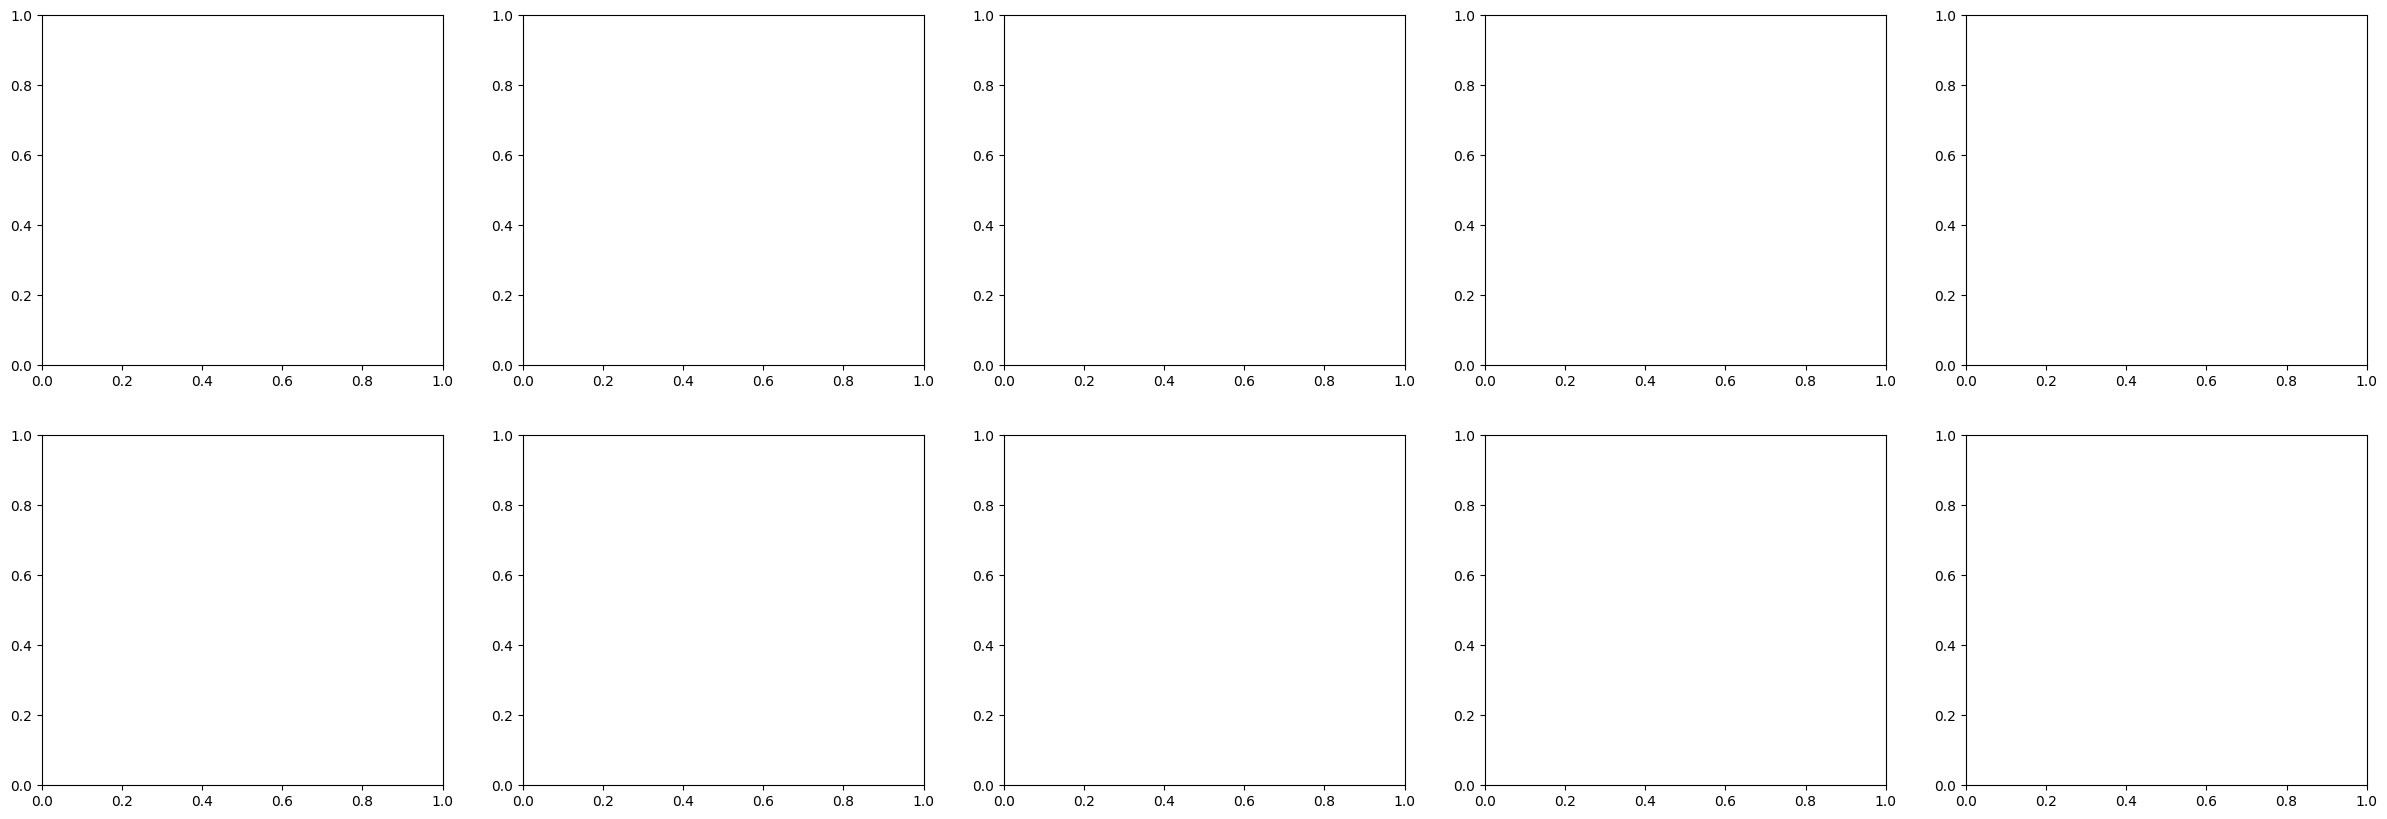

In [3]:
# Define folders for the images
original_folder = "data/UVG/Beauty"
canny_folder = "data/UVG/optical_flow/Beauty"
previous_frame_folder = "data/UVG/Beauty/quality_8"
pred_folder = "predictions/v4/Beauty"

# Retrieve image paths
image_paths = sorted(glob.glob(os.path.join(original_folder, "*.png")))  # Adjust extension if needed (e.g., .jpg)
canny_paths = sorted(glob.glob(os.path.join(canny_folder, "*.png")))     # Adjust extension if needed
previous_frames_paths = sorted(glob.glob(os.path.join(previous_frame_folder, "*.png")))  # Adjust extension if needed

# Define the prompt for processing
# prompt = "A beautiful blonde girl with pink lipstick"
prompt = 'A jockey sitting on top of a brown horse running a race track'

# Number of images you want to process
num_images = 3

# Call the function to process the images and get predictions
original_images, predictions = process_images(
    image_paths=image_paths,
    canny_paths=canny_paths,
    prompt=prompt,
    previous_frames_paths=previous_frames_paths,
    pred_folder=pred_folder,
    num_images=num_images
)

# Define the save location for the plot
plot_save_location = os.path.join(pred_folder, "original_vs_predicted.png")

# Plot the images and save the plot
# plot_images(
#     original_images=original_images,
#     predictions=predictions,
#     save_location=plot_save_location,
#     start_index=4,  # Customize the range of images for plotting
#     end_index=9,
#     dpi=300
# )

In [ ]:
import os
from PIL import Image
from test_utils import calculate_metrics_batch

# Define the dataset directories
original_root = "data/UVG"
pred_root = "predictions/final"

# Video names to process
# videos = ["Beauty", "Bosphorus", "Jockey"]
videos = [ "Bosphorus"]

# Initialize a dictionary to store metrics for each video
all_metrics = {}

# Loop through each video
for video in videos:
    original_images = []
    pred_images = []

    # Load images from im2 to im10
    for i in range(2, 11):
        original_path = os.path.join(original_root, video, f"im{i:05d}.png")  # Format: im00002.png, im00003.png, etc.
        # print(original_path)
        pred_path = os.path.join(pred_root,video, f"im{i}_pred.png")  # Format: Beauty_im2_pred.png, etc.
        # print(pred_path)
        # Load the images and append to lists
        if os.path.exists(original_path) and os.path.exists(pred_path):
            original_images.append(Image.open(original_path).convert("RGB"))
            pred_images.append(Image.open(pred_path).convert("RGB"))
        else:
            print(f"Warning: Missing image for {video} frame {i}")

    # Calculate metrics for the batch of images
    if original_images and pred_images:
        metrics = calculate_metrics_batch(original_images, pred_images)
        all_metrics[video] = metrics
        print(f"Metrics for {video}:", metrics)
    else:
        print(f"No images found for video {video}")

# Print all metrics for each video
print("\nFinal Metrics Summary for All Videos:")
for video, metrics in all_metrics.items():
    print(f"{video} Metrics: {metrics}")


In [ ]:
original_images = [Image.open("data/UVG/Beauty/im00001.png").convert("RGB"), 
                   Image.open("data/UVG/Beauty/im00002.png").convert("RGB"),
                   Image.open("data/UVG/Beauty/im00003.png").convert("RGB"),
                   Image.open("data/UVG/Beauty/im00004.png").convert("RGB"),
                   Image.open("data/UVG/Beauty/im00005.png").convert("RGB")]
pred_images = [Image.open("data/UVG/Beauty/quality_8/im00001.png").convert("RGB"), 
                   Image.open("data/UVG/Beauty/quality_8/im00002.png").convert("RGB"),
                   Image.open("data/UVG/Beauty/quality_8/im00003.png").convert("RGB"),
                   Image.open("data/UVG/Beauty/quality_8/im00004.png").convert("RGB"),
                   Image.open("data/UVG/Beauty/quality_8/im00005.png").convert("RGB")]

metrics = calculate_metrics_batch(original_images, pred_images)
print("Batch Metrics:", metrics)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define paths for the original and predicted images
original_path = 'data/UVG/Beauty/im00001.png'
prediction_8_path = 'predictions_8/im1_pred.png'
prediction_8_v8_path = 'pred_8_v8/Beauty/im1_pred.png'

# Metrics for each prediction
metrics_8 = {
    'PSNR': 15.96, 
    'MS-SSIM': 0.8374, 
    'LPIPS': 0.2572, 
    'FID': 5.9782
}

metrics_8_v8 = {
    'PSNR': 26.118643, 
    'MS-SSIM': 0.91220, 
    'LPIPS': 0.09480324, 
    'FID': 0.264220
}

# Load images
original_image = Image.open(original_path)
prediction_8_image = Image.open(prediction_8_path)
prediction_8_v8_image = Image.open(prediction_8_v8_path)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Original and Predicted Images with Metrics')

# Display original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display prediction from predictions_8
axes[1].imshow(prediction_8_image)
axes[1].set_title('Prediction from v1 Training')
axes[1].text(
    0.5, -0.15, 
    f"PSNR: {metrics_8['PSNR']}\nMS-SSIM: {metrics_8['MS-SSIM']}\nLPIPS: {metrics_8['LPIPS']}\nFID: {metrics_8['FID']}", 
    ha='center', va='top', transform=axes[1].transAxes, fontsize=12
)
axes[1].axis('off')

# Display prediction from pred_8_v8
axes[2].imshow(prediction_8_v8_image)
axes[2].set_title('Prediction from v2 Training')
axes[2].text(
    0.5, -0.15, 
    f"PSNR: {metrics_8_v8['PSNR']}\nMS-SSIM: {metrics_8_v8['MS-SSIM']}\nLPIPS: {metrics_8_v8['LPIPS']}\nFID: {metrics_8_v8['FID']}", 
    ha='center', va='top', transform=axes[2].transAxes, fontsize=12
)
axes[2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_high_res_plot(original_path, pred_q1_path, pred_q4_path, pred_q8_path, 
                          psnr_q1, mssim_q1, psnr_q4, mssim_q4, psnr_q8, mssim_q8, 
                          save_path='output_plot.png', figsize=(20, 15)):
    """
    Display a high resolution plot with original image and predictions for quality 1, 4, and 8.
    Also display PSNR and MS-SSIM values under each predicted image in bold.
    Save the plot with dpi=300.
    """
    # Load images
    original = Image.open(original_path)
    pred_q1 = Image.open(pred_q1_path)
    pred_q4 = Image.open(pred_q4_path)
    pred_q8 = Image.open(pred_q8_path)

    # Create a figure with high resolution and black background
    fig, axes = plt.subplots(1, 4, figsize=figsize)
    fig.patch.set_facecolor('black')  # Set background color to black

    # Set black background for individual axes
    for ax in axes:
        ax.set_facecolor('black')

    # Display original image
    axes[0].imshow(original)
    axes[0].set_title("Original Image", color='white')  # Title in white color
    axes[0].axis('off')

    # Display Quality 1 prediction
    axes[1].imshow(pred_q1)
    axes[1].set_title("Quality 1 Prediction", color='white')
    axes[1].axis('off')
    # Add PSNR and MS-SSIM as text under the image in bold and on two separate lines
    axes[1].text(0.5, -0.15, f"PSNR: {psnr_q1:.2f}\nMS-SSIM: {mssim_q1:.4f}", 
                 size=12, ha="center", color='white', transform=axes[1].transAxes, weight='bold')

    # Display Quality 4 prediction
    axes[2].imshow(pred_q4)
    axes[2].set_title("Quality 4 Prediction", color='white')
    axes[2].axis('off')
    # Add PSNR and MS-SSIM as text under the image in bold and on two separate lines
    axes[2].text(0.5, -0.15, f"PSNR: {psnr_q4:.2f}\nMS-SSIM: {mssim_q4:.4f}", 
                 size=12, ha="center", color='white', transform=axes[2].transAxes, weight='bold')

    # Display Quality 8 prediction
    axes[3].imshow(pred_q8)
    axes[3].set_title("Quality 8 Prediction", color='white')
    axes[3].axis('off')
    # Add PSNR and MS-SSIM as text under the image in bold and on two separate lines
    axes[3].text(0.5, -0.15, f"PSNR: {psnr_q8:.2f}\nMS-SSIM: {mssim_q8:.4f}", 
                 size=12, ha="center", color='white', transform=axes[3].transAxes, weight='bold')

    # Adjust layout for better display
    plt.tight_layout()

    # Save the plot with high DPI
    plt.savefig(save_path, dpi=300, facecolor=fig.get_facecolor())
    print(f"Figure saved as {save_path}")

    plt.show()

# Example usage
original_path = 'data/UVG/Beauty/im00004.png'
pred_q1_path = 'predictions_1/im4_pred.png'
pred_q4_path = 'predictions_4/im4_pred.png'
pred_q8_path = 'predictions_8/im4_pred.png'

# PSNR and MS-SSIM values for predictions (provided values)
psnr_q1, mssim_q1 = 14.77, 0.7226
psnr_q4, mssim_q4 = 12.92, 0.6222
psnr_q8, mssim_q8 = 15.80, 0.8594

# Call the function to display the images with metrics and save the plot
display_high_res_plot(original_path, pred_q1_path, pred_q4_path, pred_q8_path, 
                      psnr_q1, mssim_q1, psnr_q4, mssim_q4, psnr_q8, mssim_q8,
                      save_path='output_comparison.png')
